<a href="https://colab.research.google.com/github/DanielCreeklear/Simulacao_misseis/blob/main/Coordenadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Funções

In [4]:
def criarCoordenadas(quantidade, intervalo):
  default_latitude = float(-23.0000001)
  default_longitude = float(-46.0000001)
  latitude = [round(random.uniform(default_latitude, default_latitude - intervalo), 7) for x in range(quantidade)]
  longitude = [round(random.uniform(default_longitude, default_longitude - intervalo), 7) for x in range(quantidade)]
  coordenadas = {'latitude': latitude, 'longitude': longitude}
  df = pd.DataFrame(coordenadas)
  return df

Fórmula para converter Latitude ou Longitude em decimal

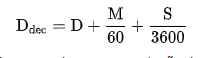

In [5]:
def converterGraus_Metros(Graus, Minutos, Segundos):
  # Fórmula completa encontra-se abaixo, mas por se tratar de distâncias menores, foi apenas considerado os segundos
  #return ((Graus * 60) + (Minutos) + (Segundos / 60)) * 1852
  return (Segundos / 60) * 1852

In [6]:
def subtrairGraus(Inicial, Final):
  GrausInicial, MinutosInicial, SegundosInicial = lerCoordenadasGraus(Inicial)
  GrausFinal, MinutosFinal, SegundosFinal = lerCoordenadasGraus(Final)
  # Preparando para a subtração
  if SegundosInicial < SegundosFinal:
    if MinutosInicial > 1: 
      MinutosInicial -= 1
    else:
      GrausInicial -= 1
      MinutosInicial += 59
    SegundosInicial += 60
  # Impedindo que apareça 1 minuto caso um dos minutos seja > 0.6
  if MinutosInicial < 1:
    MinutosInicial = 0
  if MinutosFinal < 1:
    MinutosFinal = 0
  return '{0:.0f}° {1}\' {2:.3f}\"'.format(float(GrausFinal - GrausInicial), int(MinutosFinal - MinutosInicial), float(SegundosFinal - SegundosInicial))

In [7]:
def truncar(x, n):
  return (((10 ** n) * x) / 10 ** n)

In [8]:
def converterCoordenadas_to_Decimal(graus, minutos, segundos):
  return (graus + (minutos/60) + (segundos/3600))

In [9]:
def converterDecimal_to_Coordenadas(CoordenadasDecimal):
  Graus = truncar(CoordenadasDecimal, 0)
  Minutos = truncar((abs(CoordenadasDecimal) * 60) % 60, 0)
  Segundos = (abs(CoordenadasDecimal) * 3600) % 60
  return '{0:.0f}° {1}\' {2:.3f}\"'.format(Graus, int(Minutos), Segundos)

In [10]:
def lerCoordenadasGraus(CoordenadasGrau):
  Coordenadas = CoordenadasGrau.replace(' ', '')
  indexGraus = []
  indexMinutos = []
  indexSegundos = []
  GrausPreenchido = False
  MinutosPreenchido = False
  SegundosPreenchido = False
  i = 0
  while i < len(Coordenadas):
    caracter = Coordenadas[i]
    if not (caracter.isdigit()) and not (caracter == '-') and not (caracter == '.'):
      if not (GrausPreenchido):
        indexGraus.append(0)
        indexGraus.append(i)
        GrausPreenchido = True
      elif not (MinutosPreenchido):
        indexMinutos.append(indexGraus[1] + 1)
        indexMinutos.append(i)
        MinutosPreenchido = True
      elif not (SegundosPreenchido):
        indexSegundos.append(indexMinutos[1] + 1)
        indexSegundos.append(i)
        SegundosPreenchido = True
    i += 1
  Graus = float(Coordenadas[indexGraus[0]:indexGraus[1]])
  Minutos = float(Coordenadas[indexMinutos[0]:indexMinutos[1]])
  Segundos = float(Coordenadas[indexSegundos[0]:indexSegundos[1]])
  return Graus, Minutos, Segundos

In [11]:
def calcularDistancia_DoisPontos(CoordenadasInicial, CoordenadasFinal):
  # Corrigindo a ordem das coordenadas
  if (CoordenadasInicial[0] > CoordenadasFinal[0] and CoordenadasInicial[1] > CoordenadasFinal[1]):
    La1 = CoordenadasFinal[0]
    La2 = CoordenadasInicial[0]
    Lo1 = CoordenadasFinal[1]
    Lo2 = CoordenadasInicial[1]
  elif CoordenadasInicial[0] < CoordenadasFinal[0] and CoordenadasInicial[1] > CoordenadasFinal[1]:
    La1 = CoordenadasInicial[0]
    La2 = CoordenadasFinal[0]
    Lo1 = CoordenadasFinal[1]
    Lo2 = CoordenadasInicial[1]
  elif CoordenadasInicial[0] > CoordenadasFinal[0] and CoordenadasInicial[1] < CoordenadasFinal[1]:
    La1 = CoordenadasFinal[0]
    La2 = CoordenadasInicial[0]
    Lo1 = CoordenadasInicial[1]
    Lo2 = CoordenadasFinal[1]
  else:
    La1 = CoordenadasInicial[0]
    La2 = CoordenadasFinal[0]
    Lo1 = CoordenadasInicial[1]
    Lo2 = CoordenadasFinal[1]
  Latitude = [La1, La2]
  Longitude = [Lo1, Lo2]
  # Dicionário que armazena Latitudes e Longitudes em forma de Graus
  Coordenadas = {'Latitude':[converterDecimal_to_Coordenadas(Latitude[0]), converterDecimal_to_Coordenadas(Latitude[1])], 'Longitude':[converterDecimal_to_Coordenadas(Longitude[0]), converterDecimal_to_Coordenadas(Longitude[1])]}
  # Subtração das distâncias
  distanciaLatitude = subtrairGraus(Coordenadas['Latitude'][0], Coordenadas['Latitude'][1])
  distanciaLongitude = subtrairGraus(Coordenadas['Longitude'][0], Coordenadas['Longitude'][1])
  # Conversão em metros
  Graus, Minutos, Segundos = lerCoordenadasGraus(distanciaLatitude)
  a = abs(converterGraus_Metros(Graus, Minutos, Segundos))
  Graus, Minutos, Segundos = lerCoordenadasGraus(distanciaLongitude)
  b = abs(converterGraus_Metros(Graus, Minutos, Segundos))
  return (a**2 + b**2)**(1/2)

In [12]:
def converterMetros_Graus(Metros):
  Graus = 0
  Minutos = 0
  Segundos = 0.033 * Metros
  return converterCoordenadas_to_Decimal(Graus, Minutos, Segundos)

In [13]:
PosicaoInicial = 30
PosicaoFinal = 50
if PosicaoFinal > PosicaoInicial:
  subtracao = subtrairGraus(converterDecimal_to_Coordenadas(converterMetros_Graus(PosicaoFinal)), converterDecimal_to_Coordenadas(converterMetros_Graus(PosicaoInicial)))
else:
  subtracao = subtrairGraus(converterDecimal_to_Coordenadas(converterMetros_Graus(PosicaoInicial)), converterDecimal_to_Coordenadas(converterMetros_Graus(PosicaoFinal)))
Graus, Minutos, Segundos = lerCoordenadasGraus(subtracao)
print(int(converterGraus_Metros(Graus, Minutos, Segundos) * -1))

20


In [14]:
def converterIntervalosMetros(metros):
  return converterMetros_Graus(metros)

In [18]:
def simularPontos(vezes, quantidadeFuncionarios, ladoMetros):
  # Armazenamento dos resultados
  ResultadoSucessos = []
  ResultadoFalhas = []
  TamanhoMetros = [ladoMetros for x in range(vezes)]
  MetrosQuadrados = [ladoMetros**2 for x in range(vezes)]
  Latitude = []
  Longitude = []
  # Criando espaço
  intervaloLatLong = converterIntervalosMetros(ladoMetros)
  ConjuntoCoordenadas = criarCoordenadas(quantidadeFuncionarios, intervaloLatLong)
  CirculoConfig = {'coordenadas': [(-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2)], 'raio': intervaloLatLong/2}
  for n in tqdm(range(vezes)):  
    Sucessos = int()
    Falhas = int()
    for ponto in ConjuntoCoordenadas.values.tolist():
      Latitude.append(ponto[0])
      Longitude.append(ponto[1])
      if (abs((ponto[0] - CirculoConfig['coordenadas'][0])**2) + abs((ponto[1] - CirculoConfig['coordenadas'][1])**2))**(1/2) < CirculoConfig['raio']:
        Sucessos += 1
      else:
        Falhas += 1
    ResultadoSucessos.append(Sucessos)
    ResultadoFalhas.append(Falhas)
  print(len(ResultadoSucessos),len(ResultadoFalhas), len(Latitude), len(Longitude), len(TamanhoMetros), len(MetrosQuadrados))
  #ResultadoTeste = {'Sucessos': ResultadoSucessos, 'Falhas': ResultadoFalhas, 'Latitude': Latitude, 'Longitude': Longitude,'TamanhoLado': TamanhoMetros, 'MetrosQuadrados': MetrosQuadrados}
  #return pd.DataFrame(ResultadoTeste)
  return 0

# Teste visual

Sucessos: 7
Falhas: 3


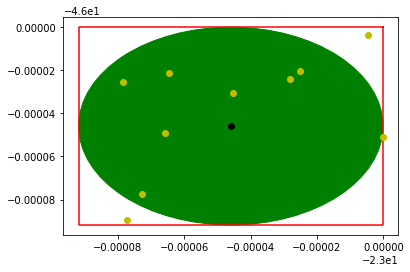

In [126]:
intervaloLatLong = converterIntervalosMetros(10)
ConjuntoCoordenadas = criarCoordenadas(10, intervaloLatLong)

CirculoConfig = {'coordenadas': [(-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2)], 'raio': intervaloLatLong/2}
circulo = plt.Circle(CirculoConfig['coordenadas'], CirculoConfig['raio'], color='g', fill=True)

fig, ax = plt.subplots()

ax.plot((-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2), 'o', color='black')
ax.plot([-23.0000001,-23.0000001 - intervaloLatLong, -23.0000001 - intervaloLatLong, -23.0000001, -23.0000001],[-46.0000001,-46.0000001, -46.0000001 - intervaloLatLong, -46.0000001 - intervaloLatLong, -46.0000001], '-', color='r')
ax.plot(ConjuntoCoordenadas['latitude'], ConjuntoCoordenadas['longitude'], 'o', color='y')
ax.add_artist(circulo)

ConjuntoCoordenadas.head(5)
Sucessos = int()
Falhas = int()
for ponto in ConjuntoCoordenadas.values.tolist():
  if (abs((ponto[0] - CirculoConfig['coordenadas'][0])**2) + abs((ponto[1] - CirculoConfig['coordenadas'][1])**2))**(1/2) < CirculoConfig['raio']:
    Sucessos += 1
  else:
    Falhas += 1
print('Sucessos: {0}\nFalhas: {1}'.format(Sucessos, Falhas))

# Simulação

In [17]:
vezes = 10
Empresa100metros = simularPontos(vezes, quantidadeFuncionarios=1000, ladoMetros=100)
print('\nQuantidade de testes: {0}\nMédia de sucessos: {1}\nMédia de falhas: {2}'.format(vezes,Empresa100metros['Sucessos'].mean(), Empresa100metros['Falhas'].mean()))
plt.hist(Empresa100metros['Sucessos'])

 20%|██        | 2/10 [00:00<00:00, 11.23it/s]

[-23.0000711, -46.0006475]
[-23.0001784, -46.0008201]
[-23.0004344, -46.0008948]
[-23.0005075, -46.0001106]
[-23.0000909, -46.000003]
[-23.0005715, -46.0005416]
[-23.0001551, -46.0007483]
[-23.0008837, -46.0002543]
[-23.0009122, -46.0004934]
[-23.0000919, -46.0002967]
[-23.0005838, -46.0002618]
[-23.0008702, -46.0001241]
[-23.0006593, -46.0003981]
[-23.0002391, -46.0001071]
[-23.0008087, -46.0007394]
[-23.0004412, -46.0004968]
[-23.0003771, -46.0008774]
[-23.0004446, -46.0005772]
[-23.0004879, -46.0007975]
[-23.0008953, -46.0001289]
[-23.0005846, -46.0000951]
[-23.0002394, -46.0001286]
[-23.0004622, -46.0005627]
[-23.0001268, -46.0008199]
[-23.0005544, -46.0005719]
[-23.0008605, -46.0004198]
[-23.0004935, -46.0006519]
[-23.0001033, -46.0000099]
[-23.0004654, -46.000504]
[-23.0000766, -46.0005627]
[-23.0007571, -46.000053]
[-23.0001459, -46.0000111]
[-23.0001332, -46.0003977]
[-23.0003947, -46.0004394]
[-23.0003446, -46.0004804]
[-23.0007073, -46.0001291]
[-23.0002831, -46.0008963]
[-23

 40%|████      | 4/10 [00:00<00:00,  9.54it/s]

[-23.0003003, -46.0000222]
[-23.0008688, -46.0005744]
[-23.0004911, -46.0006098]
[-23.0005958, -46.000895]
[-23.00067, -46.0000425]
[-23.0003576, -46.000305]
[-23.0006135, -46.0006755]
[-23.0003003, -46.0008377]
[-23.0001439, -46.0003361]
[-23.0000189, -46.0004635]
[-23.0005019, -46.0008176]
[-23.0008272, -46.0008559]
[-23.0009164, -46.0001413]
[-23.0001601, -46.0008499]
[-23.0007573, -46.0000127]
[-23.000718, -46.0008557]
[-23.0007426, -46.0004029]
[-23.0003627, -46.0005584]
[-23.0006574, -46.0001727]
[-23.0002947, -46.0008482]
[-23.0002236, -46.0008414]
[-23.0007485, -46.0005294]
[-23.0004892, -46.0000106]
[-23.0007783, -46.0005058]
[-23.0004468, -46.0004931]
[-23.0005096, -46.0007731]
[-23.0001383, -46.0003001]
[-23.0004487, -46.000709]
[-23.0000653, -46.0008618]
[-23.0002057, -46.000733]
[-23.0007152, -46.0008022]
[-23.000058, -46.0007573]
[-23.0001744, -46.0006021]
[-23.000902, -46.0007443]
[-23.0006538, -46.0006929]
[-23.0001875, -46.0004638]
[-23.0008054, -46.0003724]
[-23.00067

 60%|██████    | 6/10 [00:00<00:00,  9.16it/s]

[-23.0000711, -46.0006475]
[-23.0001784, -46.0008201]
[-23.0004344, -46.0008948]
[-23.0005075, -46.0001106]
[-23.0000909, -46.000003]
[-23.0005715, -46.0005416]
[-23.0001551, -46.0007483]
[-23.0008837, -46.0002543]
[-23.0009122, -46.0004934]
[-23.0000919, -46.0002967]
[-23.0005838, -46.0002618]
[-23.0008702, -46.0001241]
[-23.0006593, -46.0003981]
[-23.0002391, -46.0001071]
[-23.0008087, -46.0007394]
[-23.0004412, -46.0004968]
[-23.0003771, -46.0008774]
[-23.0004446, -46.0005772]
[-23.0004879, -46.0007975]
[-23.0008953, -46.0001289]
[-23.0005846, -46.0000951]
[-23.0002394, -46.0001286]
[-23.0004622, -46.0005627]
[-23.0001268, -46.0008199]
[-23.0005544, -46.0005719]
[-23.0008605, -46.0004198]
[-23.0004935, -46.0006519]
[-23.0001033, -46.0000099]
[-23.0004654, -46.000504]
[-23.0000766, -46.0005627]
[-23.0007571, -46.000053]
[-23.0001459, -46.0000111]
[-23.0001332, -46.0003977]
[-23.0003947, -46.0004394]
[-23.0003446, -46.0004804]
[-23.0007073, -46.0001291]
[-23.0002831, -46.0008963]
[-23

 70%|███████   | 7/10 [00:00<00:00,  8.14it/s]

[-23.000203, -46.0003641]
[-23.0003094, -46.0006541]
[-23.0005757, -46.0001922]
[-23.0004539, -46.000173]
[-23.0008528, -46.0001245]
[-23.0007989, -46.0007946]
[-23.0004172, -46.0002935]
[-23.0000545, -46.0002385]
[-23.0007797, -46.0005368]
[-23.0003003, -46.0000222]
[-23.0008688, -46.0005744]
[-23.0004911, -46.0006098]
[-23.0005958, -46.000895]
[-23.00067, -46.0000425]
[-23.0003576, -46.000305]
[-23.0006135, -46.0006755]
[-23.0003003, -46.0008377]
[-23.0001439, -46.0003361]
[-23.0000189, -46.0004635]
[-23.0005019, -46.0008176]
[-23.0008272, -46.0008559]
[-23.0009164, -46.0001413]
[-23.0001601, -46.0008499]
[-23.0007573, -46.0000127]
[-23.000718, -46.0008557]
[-23.0007426, -46.0004029]
[-23.0003627, -46.0005584]
[-23.0006574, -46.0001727]
[-23.0002947, -46.0008482]
[-23.0002236, -46.0008414]
[-23.0007485, -46.0005294]
[-23.0004892, -46.0000106]
[-23.0007783, -46.0005058]
[-23.0004468, -46.0004931]
[-23.0005096, -46.0007731]
[-23.0001383, -46.0003001]
[-23.0004487, -46.000709]
[-23.0000

100%|██████████| 10/10 [00:01<00:00,  9.18it/s]

[-23.0004607, -46.0002057]
[-23.0005953, -46.0008297]
[-23.0006954, -46.0003167]
[-23.0007245, -46.0008953]
[-23.0005435, -46.0007928]
[-23.0000649, -46.0007852]
[-23.0004682, -46.0000467]
[-23.0001303, -46.0005253]
[-23.0005164, -46.0004993]
[-23.0004569, -46.0006994]
[-23.0003813, -46.0001479]
[-23.0002934, -46.0007087]
[-23.000319, -46.000453]
[-23.0001983, -46.0000763]
[-23.0004168, -46.0003475]
[-23.0006139, -46.0002077]
[-23.0007043, -46.0004589]
[-23.0003025, -46.0000896]
[-23.0007563, -46.0002705]
[-23.0003464, -46.0005492]
[-23.000351, -46.0001091]
[-23.0008268, -46.000778]
[-23.0004442, -46.0008552]
[-23.0002559, -46.0006844]
[-23.0004743, -46.0005377]
[-23.0006713, -46.0005805]
[-23.0005936, -46.0002271]
[-23.0008577, -46.0007791]
[-23.0004581, -46.0003711]
[-23.000301, -46.0001504]
[-23.0002615, -46.0006371]
[-23.0006955, -46.0002907]
[-23.000083, -46.0007738]
[-23.0008097, -46.0007023]
[-23.0005466, -46.0000882]
[-23.0002955, -46.0007546]
[-23.0009115, -46.0002951]
[-23.00

TypeError: ignored